<a href="https://colab.research.google.com/github/ArtiusPhoenix/BigData/blob/main/Grupo13_Zeballos_Sposito_Cagna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import os
from google.colab import drive
import matplotlib.pyplot as plt

#Montar Google Drive para utilizar archivos (Los subi a mi drive)
drive.mount("/content/drive/")

#Ruta de la carpeta que contiene los archivos CSV
ruta_de_acceso = "/content/drive/MyDrive/Dataset de ventas2-20230916T235839Z-001/Dataset de ventas2"

archivos = os.listdir(ruta_de_acceso)
archivos

dataframes = {}

for archivo in archivos:
    if archivo.endswith('.csv'):  #Que lea unicamente archivos CSV
        mes = archivo.split('_')[3].split('.')[0]  #Obtenemos el nombre del 'MES' sin la extension
        ruta_completa = os.path.join(ruta_de_acceso, archivo)  #Ruta completa al archivo
        df = pd.read_csv(ruta_completa)  #Cargar el archivo CSV en un DataFrame
        df_ventas = df.copy()  #Copia de df_ventas

        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')

        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]
        df_ventas1 = df_ventas.dropna()

        #Transformo todos los valores numericos al tipo de dato int
        df_ventas1['Cantidad Pedida'] = df_ventas1['Cantidad Pedida'].astype(int)
        df_ventas1['Precio Unitario'] = df_ventas1['Precio Unitario'].astype(int)

        dataframes[mes] = df_ventas1  #Agregar el DataFrame al diccionario usando el nombre del mes

pd.set_option('display.float_format', '{:.2f}'.format)

Mounted at /content/drive/


In [2]:
#Calcular las ventas anuales por ciudad (suma de las ventas de todos los meses)
ventas_anuales_por_ciudad = pd.DataFrame(columns=['Ciudad', 'Ventas Anuales'])

for mes, df_mes in dataframes.items():
    direccion_df = df_mes['Dirección de Envio'].str.split(', ', expand=True)
    direccion_df.columns = ['Calle', 'Ciudad', 'Cod Post Estado']
    direccion_df[['Estado', 'Cod Post']] = direccion_df['Cod Post Estado'].str.split(' ', expand=True)

    #Que todos los DataFrames tengan las mismas columnas
    df_mes['Ventas Anuales'] = df_mes['Cantidad Pedida']

    df_ventas_desglosado = pd.concat([df_mes, direccion_df], axis=1)  # Utiliza axis=1 para concatenar por columnas
    ventas_por_ciudad_mes = df_ventas_desglosado.groupby('Ciudad')['Ventas Anuales'].sum().reset_index()
    ventas_anuales_por_ciudad = pd.concat([ventas_anuales_por_ciudad, ventas_por_ciudad_mes])

ventas_anuales_por_ciudad = ventas_anuales_por_ciudad.groupby('Ciudad')['Ventas Anuales'].sum().reset_index()

#Ordenar las ciudades por ventas
ciudades_mas_ventas = ventas_anuales_por_ciudad.sort_values(by='Ventas Anuales', ascending=False)

#Eliminar los números de la izquierda (índice)
ciudades_mas_ventas.reset_index(drop=True, inplace=True)

#Cambiar el nombre de las columnas
ciudades_mas_ventas.columns = ['Ciudad', 'Ventas Anuales']

#Titulo
encabezado = "Ventas Anuales por Ciudad"
print(encabezado.center(40))

#Ventas Anuales por ciudad
print(ciudades_mas_ventas)

       Ventas Anuales por Ciudad        
          Ciudad Ventas Anuales
0  San Francisco          50239
1    Los Angeles          33289
2  New York City          27932
3         Boston          22528
4         Dallas          16730
5        Atlanta          16602
6        Seattle          16553
7       Portland          14053
8         Austin          11153


In [9]:
# Calcula las ventas anuales por estado (suma de las ventas de todos los meses)
ventas_anuales_por_estado = pd.DataFrame(columns=['Estado', 'Ventas Anuales'])

for mes, df_mes in dataframes.items():
    direccion_df = df_mes['Dirección de Envio'].str.split(', ', expand=True)
    direccion_df.columns = ['Calle', 'Ciudad', 'Cod Post Estado']
    direccion_df[['Estado', 'Cod Post']] = direccion_df['Cod Post Estado'].str.split(' ', expand=True)

    # Asegúrate de que todos los DataFrames tengan las mismas columnas
    df_mes['Ventas Anuales'] = df_mes['Cantidad Pedida']

    df_ventas_desglosado = pd.concat([df_mes, direccion_df], axis=1)  # Utiliza axis=1 para concatenar por columnas
    ventas_por_estado_mes = df_ventas_desglosado.groupby('Estado')['Ventas Anuales'].sum().reset_index()
    ventas_anuales_por_estado = pd.concat([ventas_anuales_por_estado, ventas_por_estado_mes])

ventas_anuales_por_estado = ventas_anuales_por_estado.groupby('Estado')['Ventas Anuales'].sum().reset_index()


# Gráfico de las Ventas Anuales por Estado
fig = px.choropleth(ventas_anuales_por_estado, locations='Estado', locationmode='USA-states',
                    color='Ventas Anuales', color_continuous_scale='RdYlGn', scope='usa',
                    title='Ventas Anuales por Estado'
                    )
fig.show()

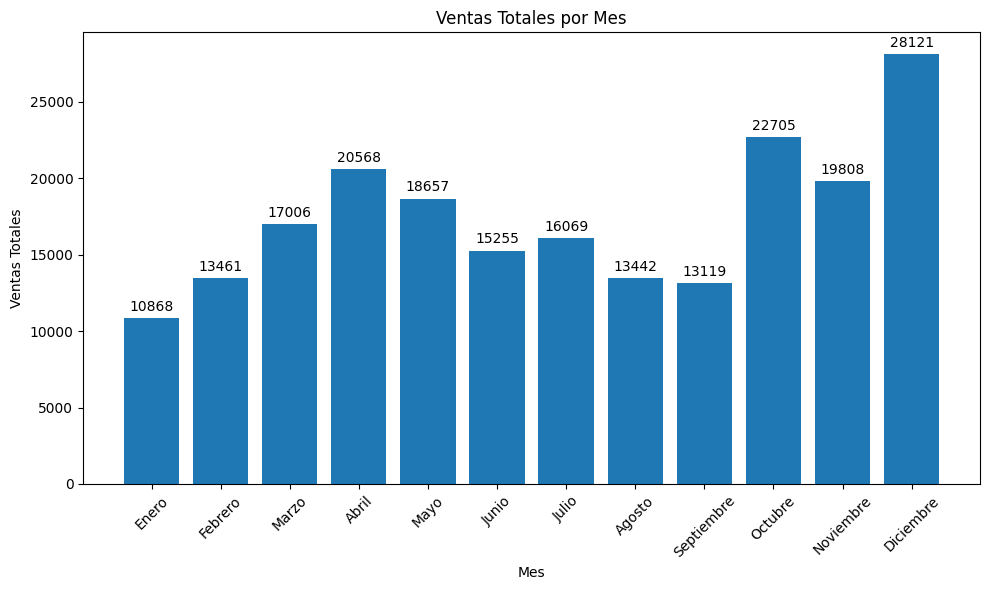

In [4]:
#Crear una lista para almacenar las ventas totales por mes
ventas_totales_por_mes = []

#Calcular la suma de las ventas de cada mesd
for mes, df_mes in dataframes.items():
    ventas_totales = df_mes['Cantidad Pedida'].sum()
    ventas_totales_por_mes.append((mes, ventas_totales))

#Crear un DataFrame a partir de la lista
df_ventas_totales = pd.DataFrame(ventas_totales_por_mes, columns=['Mes', 'Ventas Totales'])

#Ordenar el DF por mes
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_ventas_totales['Mes'] = pd.Categorical(df_ventas_totales['Mes'], categories=meses_ordenados, ordered=True)
df_ventas_totales = df_ventas_totales.sort_values(by='Mes')

#Crear el gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(df_ventas_totales['Mes'], df_ventas_totales['Ventas Totales'])
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Mes')

#Agregar etiquetas de ventas debajo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


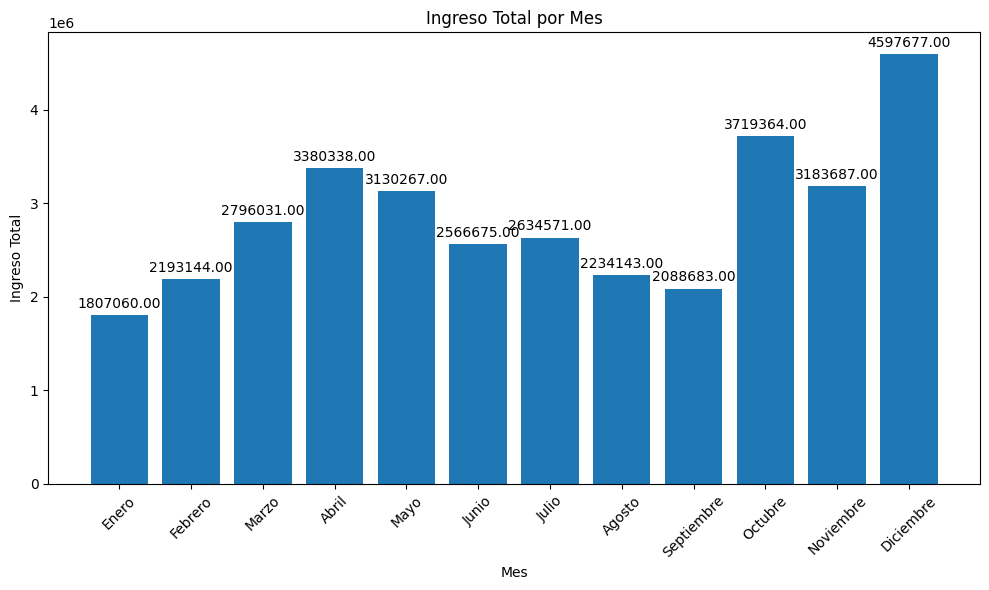

In [14]:
#Crear una lista para almacenar los ingresos totales por mes
ingresos_totales_por_mes = []

#Calcular el ingreso total de cada mes
for mes, df_mes in dataframes.items():
    ingreso_total = (df_mes['Precio Unitario'] * df_mes['Cantidad Pedida']).sum()
    ingresos_totales_por_mes.append((mes, ingreso_total))

#Crear un DataFrame a partir de la lista
df_ingresos_totales = pd.DataFrame(ingresos_totales_por_mes, columns=['Mes', 'Ingreso Total'])

#Ordenar el DF por mes
df_ingresos_totales['Mes'] = pd.Categorical(df_ingresos_totales['Mes'], categories=meses_ordenados, ordered=True)
df_ingresos_totales = df_ingresos_totales.sort_values(by='Mes')

#Crear el grafico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ingresos_totales['Mes'], df_ingresos_totales['Ingreso Total'])
plt.xlabel('Mes')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Mes')

#Agregar etiquetas de ingresos debajo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

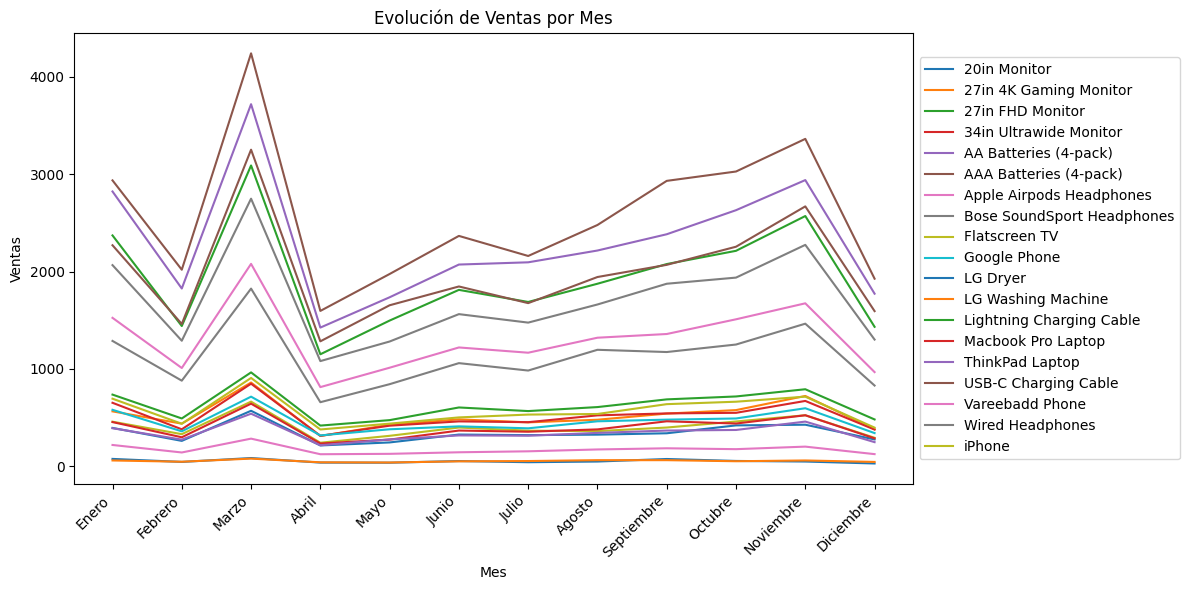

In [8]:
#Crear una lista de meses ordenados
meses_ordenados = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

#Crear grafico
fig, ax = plt.subplots(figsize=(12, 6))

#Crear un DF para las ventas
ventas_totales = pd.DataFrame()

#Buscar en el DF los datos de productos y cantidad pedida
for mes, df in dataframes.items():
    ventas_totales[mes] = df.groupby('Producto')['Cantidad Pedida'].sum()

#Ventas totales para usar en el eje Y
ventas_totales = ventas_totales.transpose()

#Configurar el eje X para mostrar los meses ordenados
ax.set_xticks(range(len(meses_ordenados)))
ax.set_xticklabels(meses_ordenados, rotation=45, ha='right')

#Titulo de grafico y ejes
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
ax.set_title('Evolución de Ventas por Mes')

#Lineas que representa productos
labels = []  #Lista de las lineas
for producto in ventas_totales.columns:
    ventas_por_producto = ventas_totales[producto]
    line, = plt.plot(ventas_por_producto, label=producto)
    labels.append(producto)

#Mostrar leyenda al lado derecho del gráfico
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

In [6]:
def mostrar_10_mas_vendidos(datos):
    #Calcular las sumas de ventas de cada producto desde el DataFrame
    total_ventas_por_producto = datos.sum()

    #Ordenar los productos por ventas
    productos_mas_vendidos = total_ventas_por_producto.sort_values(ascending=False).head(10)

    return productos_mas_vendidos

#LLamada a la función para mostrar los 10 productos más vendidos
top_10 = mostrar_10_mas_vendidos(ventas_totales)

#Mostrar los 10 productos más vendidos y sus cantidades pedidas
print(top_10)

Producto
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
dtype: int64


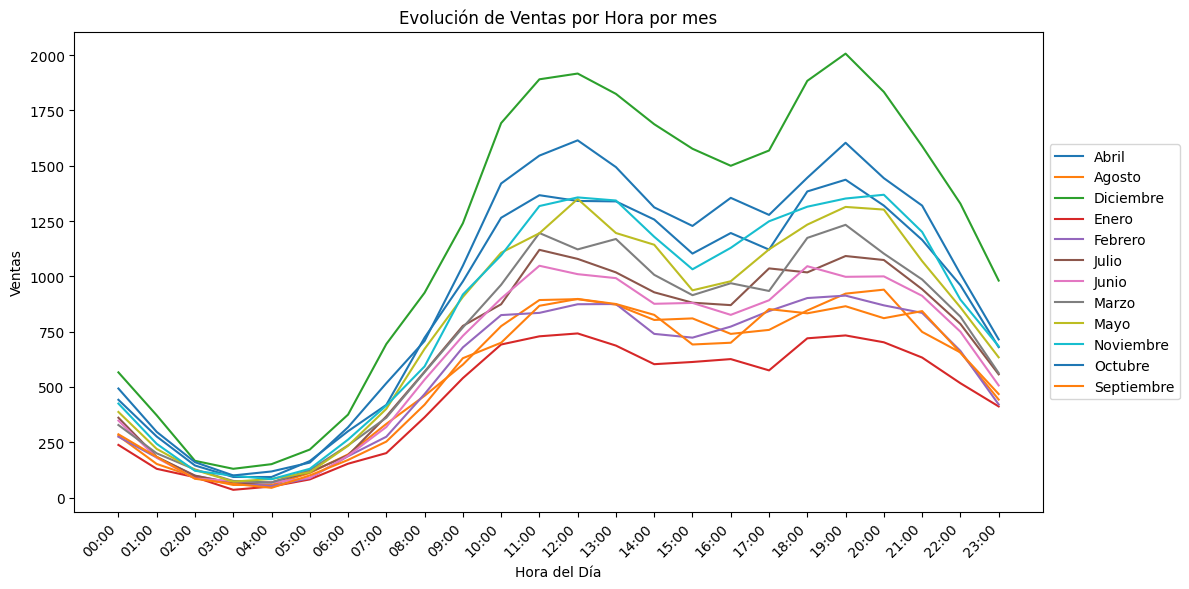

In [13]:
def plot_ventas_por_hora(dataframes):
    #Crear un DataFrame para las ventas por hora
    ventas_por_hora = pd.DataFrame()

    #Buscar en el DF los datos de horas de pedido y cantidad pedida
    for mes, df in dataframes.items():
        df['Fecha de Pedido'] = pd.to_datetime(df['Fecha de Pedido'])
        #Extraer la hora de pedido y sumar la cantidad pedida
        df['Hora de Pedido'] = df['Fecha de Pedido'].dt.hour
        ventas_por_hora[mes] = df.groupby('Hora de Pedido')['Cantidad Pedida'].sum()

    #Configurar el gráfico
    fig, ax = plt.subplots(figsize=(12, 6))

    #Configurar el eje X para mostrar las horas del día
    horas_del_dia = list(range(24))
    ax.set_xticks(horas_del_dia)
    ax.set_xticklabels([f"{hora:02}:00" for hora in horas_del_dia], rotation=45, ha='right')

    #Titulo de grafico y ejes
    ax.set_xlabel('Hora del Día')
    ax.set_ylabel('Ventas')
    ax.set_title('Evolución de Ventas por Hora por mes')

    #Lineas que representan los meses
    etiquetas = []
    for mes in ventas_por_hora.columns:
        ventas_por_hora_por_hora = ventas_por_hora[mes]
        linea, = plt.plot(horas_del_dia, ventas_por_hora_por_hora, label=mes)
        etiquetas.append(mes)

    #Mostrar referencias del gráfico
    ax.legend(etiquetas, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

plot_ventas_por_hora(dataframes) #Grafico